In [1]:
import cv2
import skimage
import matplotlib.pyplot as plt
import numpy as np
import os
import random

In [36]:
picture = cv2.imread('C:/Users/mstan/OneDrive/Dokumenty/GitHub/2024-25b-fai2-adsai-MonikaStangenberg231648/datalab_tasks/task1/2nd/train_Alican_231648_im1.png')

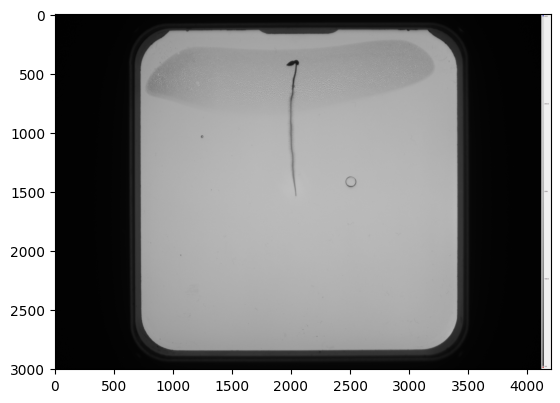

In [37]:
plt.imshow(picture)

There is a white strip on the right side, so I am cropping it

In [5]:
cropped_picture = picture[:, :-150]

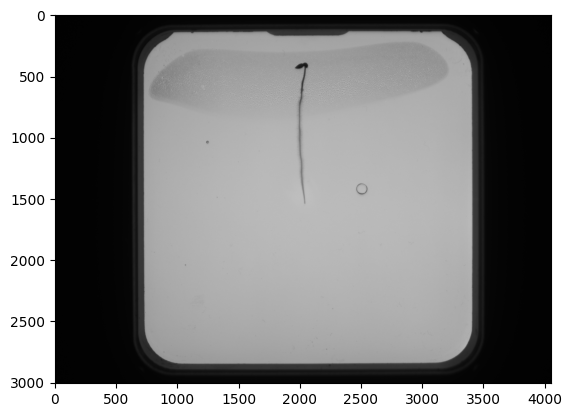

In [6]:
plt.imshow(cropped_picture)

In [7]:
cropped_picture.shape

(3006, 4052, 3)

In [8]:
#hwd
x, y, z = cropped_picture.shape

Text(0.5, 0, 'Pixel location on the blue line')

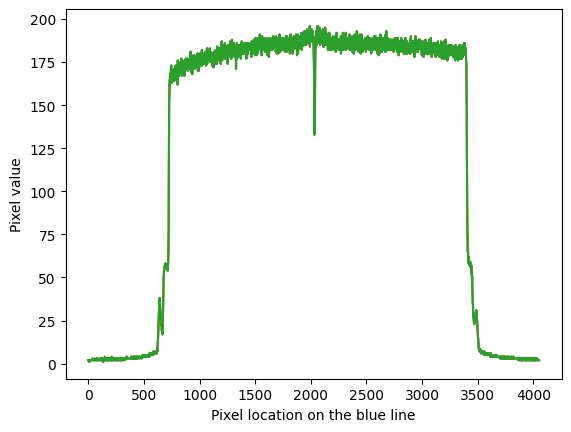

In [ ]:
x1 = x//2 #I am setting a middle point of the picture ane I am taking the middle line of the picture
plt.plot(cropped_picture[x1, 0:y])
plt.ylabel('Pixel value')
plt.xlabel('Pixel location on the blue line')

In [ ]:
valid_columns = (cropped_picture[x1, :, :] >= 100).any(axis=1)  #I am taking only the columns where the pixel value is greater than 100
trimmed_picture1 = cropped_picture[:, valid_columns, :]

In [11]:
trimmed_picture1.shape

(3006, 2679, 3)

In [ ]:
x_trimmed, y_trimmed, z_trimmed = trimmed_picture1.shape

y2 = y_trimmed//2 #I am setting a middle point of the picture and I am taking the middle line of the picture

In [ ]:
valid_rows = (trimmed_picture1[:, y2, :] >= 100).any(axis=1) #I am taking only the rows where the pixel value is greater than 100
trimmed_picture2 = trimmed_picture1[valid_rows, :, :]

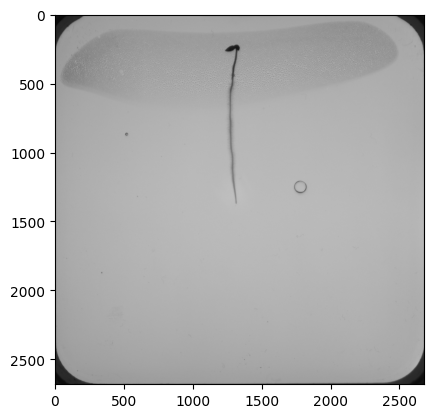

In [ ]:
plt.imshow(trimmed_picture2) #I am showing the final picture

I put everything together in this function and I added trimming at the end. 

In [4]:
def trim_picture(picture):
    # Trim 150 pixels from the right side of the image
    picture = picture[:, :-150, :]
    # Original dimensions of the picture
    xo, yo, zo = picture.shape
    # I find the middle row and identify valid columns based on pixel values
    x1 = xo//2
    valid_columns = (picture[x1, :, :] >= 100).any(axis=1)
    trimmed_picture1 = picture[:, valid_columns, :] # Trim invalid columns
    # New dimensions of the picture
    x_trimmed, y_trimmed, z_trimmed = trimmed_picture1.shape
    # I find the middle row and identify valid columns based on pixel values
    y2 = y_trimmed//2
    valid_rows = (trimmed_picture1[:, y2, :] >= 100).any(axis=1)
    trimmed_picture2 = trimmed_picture1[valid_rows, :, :]
    # New dimensions of the picture
    x, y, z = trimmed_picture2.shape
    # Checking if the picture is already a square
    if x == y:
        return trimmed_picture2
    min_dim = min(x, y)
    if x > y: # Crop excess rows if height is greater than width
        excess = x - min_dim
        start = excess // 2
        end = start + min_dim 
        squared_picture = trimmed_picture2[start:end, :, :] 
    else: # Crop excess columns if width is greater than height
        excess = y - min_dim
        start = excess // 2
        end = start + min_dim
        squared_picture = trimmed_picture2[:, start:end, :]
    return squared_picture


Importing two random images from Y2B_24

In [2]:
image_files = [f for f in os.listdir('C:/all files for block B/Y2B_24/images/train')]

random_image_files = random.sample(image_files, 2)

random_image1 = cv2.imread(os.path.join('C:/all files for block B/Y2B_24/images/train', random_image_files[0]))
random_image2 = cv2.imread(os.path.join('C:/all files for block B/Y2B_24/images/train', random_image_files[1]))

In [8]:
image1_trimmed = trim_picture(random_image1)
image2_trimmed = trim_picture(random_image2)

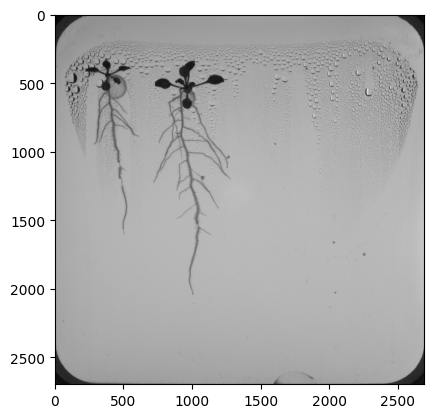

In [6]:
plt.imshow(image1_trimmed)

In [7]:
image1_trimmed.shape

(2696, 2696, 3)

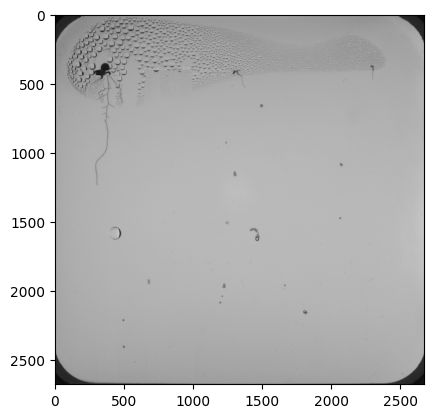

In [9]:
plt.imshow(image2_trimmed)

In [10]:
image2_trimmed.shape

(2676, 2676, 3)

Importing two random images from Y2B_23

In [17]:
image_files = [f for f in os.listdir(r'C:\all files for block B\Y2B_23\images')]

random_image_files = random.sample(image_files, 2)

random_image3 = cv2.imread(os.path.join(r'C:\all files for block B\Y2B_23\images', random_image_files[0]))
random_image4 = cv2.imread(os.path.join(r'C:\all files for block B\Y2B_23\images', random_image_files[1]))

In [18]:
image3_trimmed = trim_picture(random_image3)
image4_trimmed = trim_picture(random_image4)

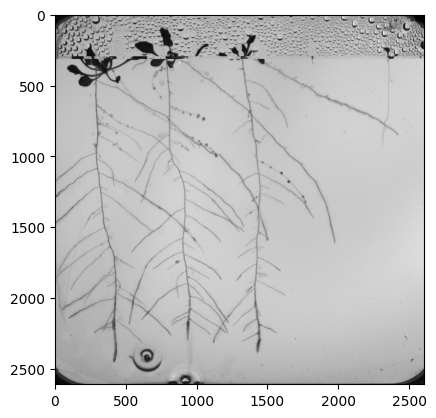

In [19]:
plt.imshow(image3_trimmed)

In [20]:
image3_trimmed.shape

(2609, 2609, 3)

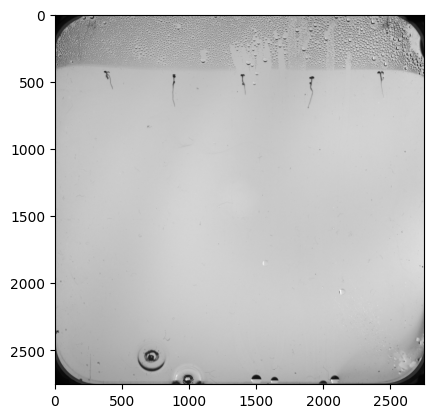

In [21]:
plt.imshow(image4_trimmed)

In [22]:
image4_trimmed.shape

(2754, 2754, 3)